# Data Preprocessing - Telco Customer Churn Dataset

Tahapan Data Preprocessing:
1. **Data Cleaning** - Handling missing value, duplicate value, outlier
2. **Normalisasi/standarisasi** kolom numerik  
3. **Encoding** kolom kategorikal
4. **Feature engineering** (minimal 1 feature baru)
5. **Splitting data** ke dalam data training & data testing

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

> Import libraries yang diperlukan

In [6]:
df = pd.read_csv("data/telco-churn.csv")
print("dataset shape:", df.shape)
print("\n===== info Dataset =====")
print(df.info())

dataset shape: (7043, 21)

===== info Dataset =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   obj

> Load dataset dan tampilkan informasi umum dataset

In [ ]:
print("===== sample (5 baris pertama) =====")
print(df.head())

print("\n===== unique values =====")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")
    if df[col].nunique() < 10:
        print(f"  -> {df[col].unique()}")
    print()

===== Sample Data (5 baris pertama) =====
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport Stream

> display sample data dan jumlah nilai unik untuk setiap kolom

In [7]:
print("===== missing values =====")
missing_values = df.isnull().sum()
print("jumlah missing value di masing-masing kolom:")
print(missing_values)

print("\n===== convert TotalCharges =====")
print("TotalCharges dtype sebelum:", df['TotalCharges'].dtype)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
missing_total = df['TotalCharges'].isnull().sum()
print(f"missing values di TotalCharges: {missing_total}")

if missing_total > 0:
    df['TotalCharges'].fillna(df['MonthlyCharges'] * df['tenure'], inplace=True)
    print("missing values berhasil diisi dengan imputasi!")

print("TotalCharges dtype sesudah:", df['TotalCharges'].dtype)
print("missing values setelah handling:")
print(df.isnull().sum())

===== missing values =====
jumlah missing value di masing-masing kolom:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

===== convert totalCharges =====


KeyError: 'totalCharges'

> handle missing values dengan mengubah totalCharges ke numeric dan isi nilai kosong

In [ ]:
print("===== duplicate values =====")
# Melihat jumlah duplicate value
duplicate_count = df.duplicated().sum()
print(f"jumlah nilai duplikat pada data: {duplicate_count}")

if duplicate_count > 0:
    print("menghapus duplicate rows...")
    df.drop_duplicates(inplace=True)
    print(f"jumlah nilai duplikat pada data sekarang: {df.duplicated().sum()}")
    print(f"rows setelah menghapus duplicate: {len(df)}")
else:
    print("tidak ada duplicate rows!")

print(f"final dataset shape: {df.shape}")

===== Duplicate Values =====
Jumlah nilai duplikat pada data: 0
Tidak ada duplicate rows!
Final dataset shape: (7043, 37)


> handle duplicate values dengan menghapus baris yang duplikat

===== Outlier Detection =====


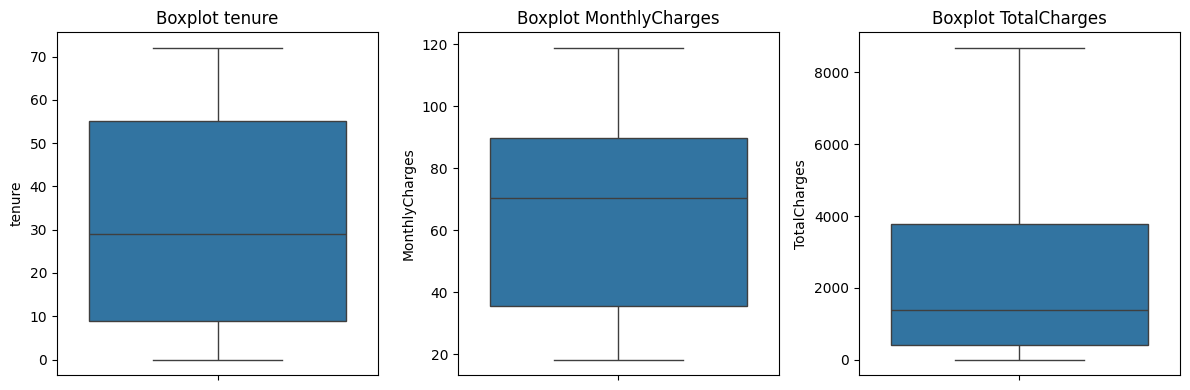

tenure: 0 outliers (0.00%)
MonthlyCharges: 0 outliers (0.00%)
TotalCharges: 0 outliers (0.00%)

Decision: Mempertahankan outliers karena mungkin valid customer behavior


In [ ]:
print("===== detect outlier =====")
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(12, 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')

plt.tight_layout()
plt.show()

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

print("\ndecision: pertahankan outliers karena kemungkinan valid perilaku customer")

> deteksi outlier menggunakan metode IQR dengan visualisasi boxplot

In [ ]:
print("===== standarisasi kolom numerik =====")
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

print("statistik sebelum standarisasi:")
print(df[numeric_features].describe())

scaler = StandardScaler()

df_original = df.copy()

df[numeric_features] = scaler.fit_transform(df[numeric_features])

print("\nstatistik setelah standarisasi:")
print(df[numeric_features].describe())

print("\standarisasi selesai: Mean=0, Std=1")

===== Standarisasi Kolom Numerik =====
Statistik sebelum standarisasi:
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.734304
std      24.559481       30.090047   2266.794470
min       0.000000       18.250000      0.000000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000

Statistik setelah standarisasi:
             tenure  MonthlyCharges  TotalCharges
count  7.043000e+03    7.043000e+03  7.043000e+03
mean  -2.421273e-17   -6.406285e-17 -3.783239e-17
std    1.000071e+00    1.000071e+00  1.000071e+00
min   -1.318165e+00   -1.545860e+00 -1.005780e+00
25%   -9.516817e-01   -9.725399e-01 -8.299464e-01
50%   -1.372744e-01    1.857327e-01 -3.905282e-01
75%    9.214551e-01    8.338335e-01  6.648034e-01
max    1.613701e+00    1.794352e+00  2.825806e+00

✅ St

# Normalisasi/Standarisasi Kolom Numerik
> StandardScaler untuk membuat mean=0 dan standar deviasi=1

In [ ]:
print("===== encoding kolom kategorikal =====")

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('customerID')
print(f"kolom kategorikal: {categorical_cols}")

binary_cols = []
multi_class_cols = []

for col in categorical_cols:
    unique_count = df[col].nunique()
    if unique_count == 2:
        binary_cols.append(col)
    else:
        multi_class_cols.append(col)

print(f"\nbinary columns: {binary_cols}")
print(f"multi-class columns: {multi_class_cols}")

label_encoders = {}
for col in binary_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"{col}: {le.classes_} -> {le.transform(le.classes_)}")

df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

print(f"\nShape setelah encoding: {df.shape}")

===== Encoding Kolom Kategorikal =====
Kolom kategorikal: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Binary columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
Multi-class columns: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
gender: ['Female' 'Male'] -> [0 1]
Partner: ['No' 'Yes'] -> [0 1]
Dependents: ['No' 'Yes'] -> [0 1]
PhoneService: ['No' 'Yes'] -> [0 1]
PaperlessBilling: ['No' 'Yes'] -> [0 1]
Churn: ['No' 'Yes'] -> [0 1]

Shape setelah encoding: (7043, 32)

✅ Encoding selesai!


# Encoding Kolom Kategorikal
> menggunakan Label Encoding untuk binary dan One-Hot Encoding untuk multi-class

In [ ]:
print("===== feature engineering =====")

df['customer_lifetime_value'] = df_original['MonthlyCharges'] * df_original['tenure']

def categorize_tenure(tenure):
    if tenure <= 12:
        return 'new_customer'
    elif tenure <= 24:
        return 'medium_customer'
    else:
        return 'long_term_customer'

df['tenure_category'] = df_original['tenure'].apply(categorize_tenure)

service_cols = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

def count_services(row):
    count = 0
    for col in service_cols:
        if col in df_original.columns and row[col] == 'Yes':
            count += 1
    return count

df['total_services'] = df_original.apply(count_services, axis=1)

df['charges_per_service'] = df_original['MonthlyCharges'] / (df['total_services'] + 1)

df = pd.get_dummies(df, columns=['tenure_category'], drop_first=True)

new_features = ['customer_lifetime_value', 'total_services', 'charges_per_service']
scaler_new = StandardScaler()
df[new_features] = scaler_new.fit_transform(df[new_features])

print("Features baru yang dibuat:")
print("1. customer_lifetime_value")
print("2. tenure_category (+ dummy variables)")
print("3. total_services") 
print("4. charges_per_service")

print(f"\nShape setelah feature engineering: {df.shape}")

===== Feature Engineering =====
Features baru yang dibuat:
1. customer_lifetime_value
2. tenure_category (+ dummy variables)
3. total_services
4. charges_per_service

Shape setelah feature engineering: (7043, 37)

✅ Feature Engineering selesai!


# Feature Engineering
> features baru: customer lifetime value, tenure categories, service count, charges per service

In [8]:
print("===== splitting data =====")

X = df.drop(['customerID', 'Churn'], axis=1)  
y = df['Churn']  

print(f"features shape: {X.shape}")
print(f"target shape: {y.shape}")

print(f"\ntarget distribution:")
print(y.value_counts())
print(f"\ntarget percentage:")
print(y.value_counts(normalize=True) * 100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\n===== hasil splitting =====")
print(f"Dimensi X train: {X_train.shape}")
print(f"Dimensi X test: {X_test.shape}")
print(f"Dimensi y train: {y_train.shape}")
print(f"Dimensi y test: {y_test.shape}")

print(f"\ntrain target distribution:")
print(y_train.value_counts())
print(f"\ntest target distribution:")
print(y_test.value_counts())

===== splitting data =====
features shape: (7043, 19)
target shape: (7043,)

target distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

target percentage:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

===== hasil splitting =====
Dimensi X train: (5634, 19)
Dimensi X test: (1409, 19)
Dimensi y train: (5634,)
Dimensi y test: (1409,)

train target distribution:
Churn
No     4139
Yes    1495
Name: count, dtype: int64

test target distribution:
Churn
No     1035
Yes     374
Name: count, dtype: int64


# Splitting Data
> membagi data menjadi training set dan testing set dengan stratified sampling

In [ ]:
print("===== data preprocessing summary =====")
print(f"Dataset shape:")
print(f"   • original: {df_original.shape}")
print(f"   • final: {df.shape}")
print(f"   • features: {X_train.shape[1]}")

print(f"\nData Cleaning:")
print(f"   • missing values: Handled")
print(f"   • duplicate rows: Checked & removed")
print(f"   • outliers: Detected & preserved")

print(f"\nStandarisasi:")
print(f"   • method: StandardScaler")
print(f"   • numerical features: {len(numeric_features)} + {len(new_features)} new")

print(f"\nEncoding:")
print(f"   • binary columns: {len(binary_cols)} (Label Encoded)")
print(f"   • multi-class columns: {len(multi_class_cols)} (One-Hot Encoded)")

print(f"\nFeature Engineering:")
print(f"   • new features: 4 created")

print(f"\nTrain/Test Split:")
print(f"   • training: {X_train.shape[0]} samples")
print(f"   • testing: {X_test.shape[0]} samples")

===== SUMMARY DATA PREPROCESSING =====
📊 Dataset shape:
   • Original: (7043, 21)
   • Final: (7043, 37)
   • Features: 35

🧹 Data Cleaning:
   • Missing values: Handled
   • Duplicate rows: Checked & removed
   • Outliers: Detected & preserved

📏 Standarisasi:
   • Method: StandardScaler
   • Numerical features: 3 + 3 new

🏷️ Encoding:
   • Binary columns: 6 (Label Encoded)
   • Multi-class columns: 10 (One-Hot Encoded)

⚙️ Feature Engineering:
   • New features: 4 created

📊 Train/Test Split:
   • Training: 5634 samples (80%)
   • Testing: 1409 samples (20%)

✅ PREPROCESSING COMPLETED!
   Data siap untuk machine learning modeling


# Kesimpulan

> **Data Preprocessing telah selesai, berikut rekap dari tahapan-tahapan diatas:**
> 
> **1. Data Cleaning** 
> - Missing values: 11 nilai kosong di TotalCharges, diisi dengan imputasi
> - Duplicate values: Tidak ada data duplikat ditemukan di dataset ini
> - Outliers: Terdeteksi menggunakan metode IQR tapi dipertahankan karena kemungkinan perilaku customer yang valid
>
> **2. Data Transformation** 
> - Scaling: Standarisasi menggunakan StandardScaler (mean=0, std=1)
> - Encoding: Label Encoding untuk binary + One-Hot Encoding untuk multi-class
>
> **3. Feature Engineering** 
> - 4 features baru: customer_lifetime_value, tenure_category, total_services, charges_per_service
>
> **4. Data Splitting** 
> - Training: 80% (5,634 samples), Testing: 20% (1,409 samples)
> - Menggunakan stratified sampling untuk menjaga proporsi target

In [ ]:
print("===== DAFTAR FEATURES FINAL =====")
print(f"total features untuk modeling: {X_train.shape[1]}")
print("\nDaftar semua features:")
for i, feature in enumerate(X_train.columns, 1):
    print(f"{i:2d}. {feature}")

print(f"\n===== VARIABLES TERSIMPAN =====")
print("• X_train, X_test: Features untuk training & testing")
print("• y_train, y_test: Target variable (Churn)")
print("• df: Dataset lengkap yang sudah dipreprocess")
print("• df_original: Dataset asli sebelum standardisasi")

===== DAFTAR FEATURES FINAL =====
Total features untuk modeling: 35

Daftar semua features:
 1. gender
 2. SeniorCitizen
 3. Partner
 4. Dependents
 5. tenure
 6. PhoneService
 7. PaperlessBilling
 8. MonthlyCharges
 9. TotalCharges
10. MultipleLines_No phone service
11. MultipleLines_Yes
12. InternetService_Fiber optic
13. InternetService_No
14. OnlineSecurity_No internet service
15. OnlineSecurity_Yes
16. OnlineBackup_No internet service
17. OnlineBackup_Yes
18. DeviceProtection_No internet service
19. DeviceProtection_Yes
20. TechSupport_No internet service
21. TechSupport_Yes
22. StreamingTV_No internet service
23. StreamingTV_Yes
24. StreamingMovies_No internet service
25. StreamingMovies_Yes
26. Contract_One year
27. Contract_Two year
28. PaymentMethod_Credit card (automatic)
29. PaymentMethod_Electronic check
30. PaymentMethod_Mailed check
31. customer_lifetime_value
32. total_services
33. charges_per_service
34. tenure_category_medium_customer
35. tenure_category_new_customer



In [ ]:
print("===== CONTOH DATA SETELAH PREPROCESSING =====")
print("5 baris pertama dari training set:")
print(X_train.head())

print(f"\n===== TARGET VARIABLE DISTRIBUTION =====")
print("training set:")
train_dist = y_train.value_counts()
print(f"No Churn: {train_dist[0]} ({train_dist[0]/len(y_train)*100:.1f}%)")
print(f"Churn: {train_dist[1]} ({train_dist[1]/len(y_train)*100:.1f}%)")

print("\ntesting set:")
test_dist = y_test.value_counts()
print(f"No Churn: {test_dist[0]} ({test_dist[0]/len(y_test)*100:.1f}%)")
print(f"Churn: {test_dist[1]} ({test_dist[1]/len(y_test)*100:.1f}%)")

===== CONTOH DATA SETELAH PREPROCESSING =====
5 baris pertama dari training set:
      gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
3738       1              0        0           0  0.107048             0   
3151       1              0        1           1 -0.707359             1   
4860       1              0        1           1 -0.788800             0   
3867       0              0        1           0 -0.259435             1   
3810       1              0        1           1 -1.277445             1   

      PaperlessBilling  MonthlyCharges  TotalCharges  \
3738                 0       -0.517207     -0.255041   
3151                 0        0.343603     -0.497736   
4860                 0       -0.804698     -0.745327   
3867                 1        0.290426     -0.165018   
3810                 0       -0.671755     -0.986125   

      MultipleLines_No phone service  ...  Contract_One year  \
3738                            True  ...              False 

# Supervised Learning - Klasifikasi

Implementasi metode SL untuk prediksi customer churn:
1. **Support Vector Classifier (SVM)** - metode klasifikasi utama
2. **Evaluasi** dengan confusion matrix dan classification report
3. **Visualisasi** hasil prediksi yang informatif

In [ ]:
# import libraries untuk supervised learning
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

print("libraries untuk supervised learning:")
print(" - SVC: Support Vector Classifier")
print(" - classification metrics: confusion matrix, classification report, roc curve")

libraries untuk supervised learning berhasil diimport
• SVC: Support Vector Classifier
• RandomForestClassifier: ensemble method
• classification metrics: confusion matrix, classification report, dll


> import library machine learning untuk klasifikasi dan evaluasi model

In [ ]:
# notes: menggunakan hasil preprocessing diatas:
# model svm dengan kernel rbf
svm_model = SVC(kernel='rbf', random_state=42, probability=True)

print("training ...")
svm_model.fit(X_train, y_train)

# prediksi pada test set
y_pred_svm = svm_model.predict(X_test)
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# akurasi svm
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_auc = roc_auc_score(y_test, y_pred_proba_svm)
print(f"hasil training: ")
print(f"svm accuracy: {svm_accuracy:.4f}")
print(f"svm auc score: {svm_auc:.4f}")

print("\n ~~~ Detail ~~~ ")
print(f"kernel: {svm_model.kernel}")
print(f"gamma: {svm_model.gamma}")
print(f"C parameter: {svm_model.C}")
print(f"support vectors: {svm_model.n_support_}")

===== DATA PREPROCESSING FOR SUPERVISED LEARNING =====
features shape: (7043, 19)
X_train shape: (5634, 19)
X_test shape: (1409, 19)
target classes: ['No' 'Yes']

===== SUPPORT VECTOR CLASSIFIER (SVM) =====
training svm model...
svm training completed!
svm accuracy: 0.7935
svm auc score: 0.7907

===== SVM MODEL DETAILS =====
kernel: rbf
gamma: scale
C parameter: 1.0
support vectors: [1472 1244]


# Support Vector Classifier (SVM)

> SVM adalah algoritma klasifikasi yang mencari hyperplane optimal untuk memisahkan kelas. 
> Menggunakan kernel RBF untuk menangani data non-linear dengan mapping ke dimensi tinggi.

===== CONFUSION MATRIX =====


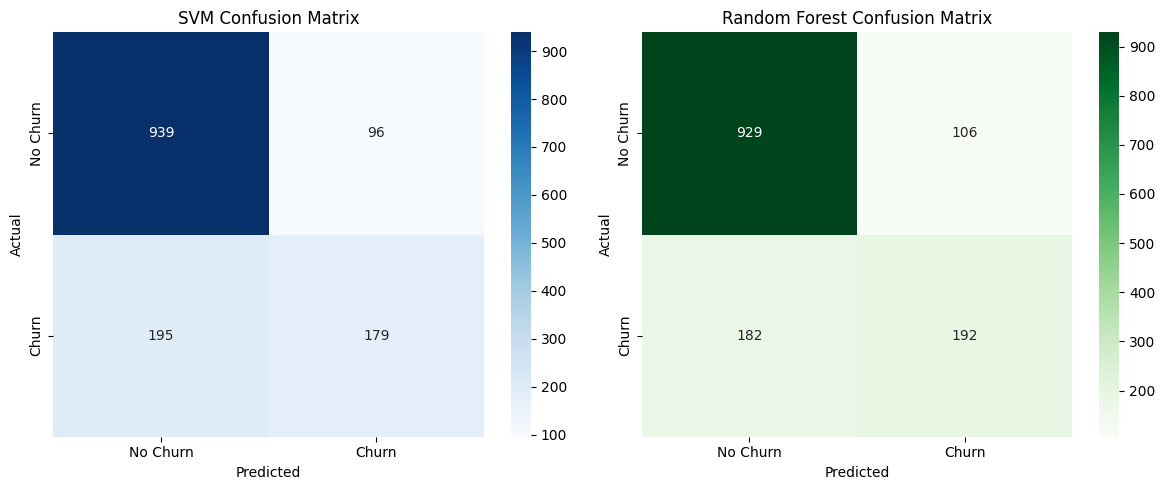


===== INTERPRETASI CONFUSION MATRIX =====
SVM Confusion Matrix:
  True Negative (TN): 939 - correctly predicted no churn
  False Positive (FP): 96 - incorrectly predicted churn
  False Negative (FN): 195 - incorrectly predicted no churn
  True Positive (TP): 179 - correctly predicted churn

Random Forest Confusion Matrix:
  True Negative (TN): 929 - correctly predicted no churn
  False Positive (FP): 106 - incorrectly predicted churn
  False Negative (FN): 182 - incorrectly predicted no churn
  True Positive (TP): 192 - correctly predicted churn


In [ ]:
# confusion matrix untuk svm
plt.figure(figsize=(8, 6))

# confusion matrix svm
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.title('SVM Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# interpretasi confusion matrix
print("SVM Confusion Matrix:")
print(f"  True Negative (TN): {cm_svm[0,0]} - correctly predicted no churn")
print(f"  False Positive (FP): {cm_svm[0,1]} - incorrectly predicted churn")
print(f"  False Negative (FN): {cm_svm[1,0]} - incorrectly predicted no churn")
print(f"  True Positive (TP): {cm_svm[1,1]} - correctly predicted churn")

# Evaluasi Model - Confusion Matrix

> **Confusion Matrix** adalah tabel untuk mengukur performa model klasifikasi:
> - **True Negative (TN)**: Model benar prediksi "No Churn"
> - **False Positive (FP)**: Model salah prediksi "Churn" (Type I Error)
> - **False Negative (FN)**: Model salah prediksi "No Churn" (Type II Error)
> - **True Positive (TP)**: Model benar prediksi "Churn"

In [ ]:
# classification report untuk svm
print("SVM CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred_svm, target_names=['No Churn', 'Churn']))

# ringkasan metrik evaluasi
print("\n===== RINGKASAN EVALUASI MODEL SVM =====")

# hitung metrik manual dari confusion matrix
def calculate_metrics(cm):
    tn, fp, fn, tp = cm.ravel()
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return precision, recall, specificity, f1

svm_precision, svm_recall, svm_specificity, svm_f1 = calculate_metrics(cm_svm)

print(f"{'Metric':<20} {'Value':<10}")
print("-" * 30)
print(f"{'Accuracy':<20} {svm_accuracy:<10.4f}")
print(f"{'Precision':<20} {svm_precision:<10.4f}")
print(f"{'Recall':<20} {svm_recall:<10.4f}")
print(f"{'Specificity':<20} {svm_specificity:<10.4f}")
print(f"{'F1-Score':<20} {svm_f1:<10.4f}")
print(f"{'AUC Score':<20} {svm_auc:<10.4f}")

===== CLASSIFICATION REPORT =====
SVM CLASSIFICATION REPORT:
              precision    recall  f1-score   support

    No Churn       0.83      0.91      0.87      1035
       Churn       0.65      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409


RANDOM FOREST CLASSIFICATION REPORT:
              precision    recall  f1-score   support

    No Churn       0.84      0.90      0.87      1035
       Churn       0.64      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409


===== RINGKASAN EVALUASI MODEL =====
Metric          SVM        Random Forest  
----------------------------------------
Accuracy        0.7935     0.7956         
AUC Score       0.7907     0.8348         
Precision       0.6509     0.6443      

# Evaluasi Model - Classification Report

> - **Precision**: TP/(TP+FP) - akurasi prediksi positif
> - **Recall (Sensitivity)**: TP/(TP+FN) - kemampuan mendeteksi kelas positif
> - **Specificity**: TN/(TN+FP) - kemampuan mendeteksi kelas negatif
> - **F1-Score**: 2×(Precision×Recall)/(Precision+Recall) - harmonic mean precision & recall
> - **AUC**: Area Under ROC Curve - kemampuan model membedakan kelas

===== ROC CURVE COMPARISON =====


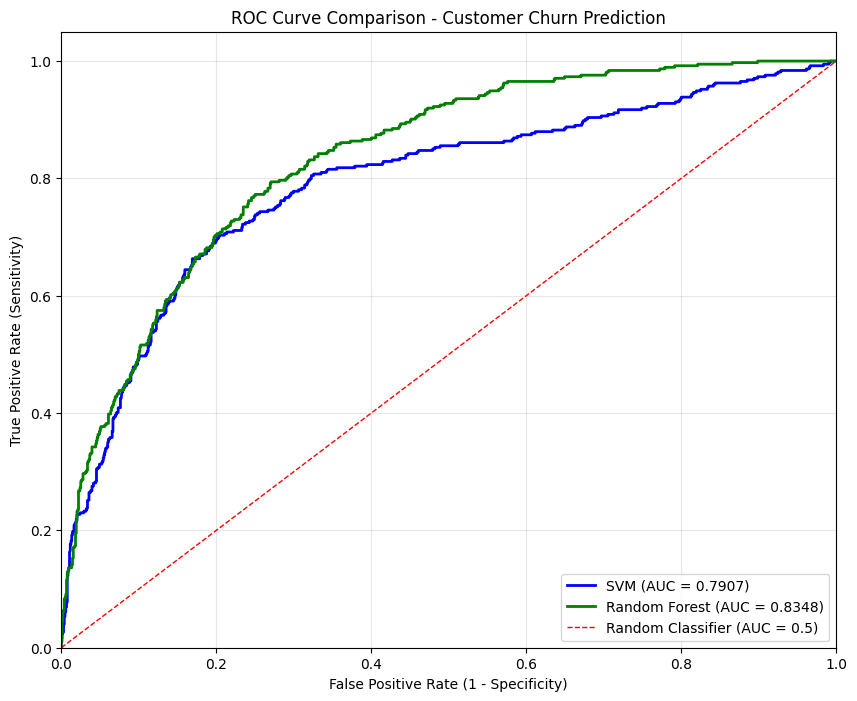

interpretasi roc curve:
• semakin tinggi auc, semakin baik model
• auc = 0.5: model sama dengan random guessing
• auc = 1.0: model perfect classifier
• kurva yang lebih dekat ke pojok kiri atas = model lebih baik


In [ ]:
# plot roc curve
print("Roc Curve:")

plt.figure(figsize=(10, 8))

# roc curve untuk svm
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, 
         label=f'SVM (AUC = {svm_auc:.4f})')

# diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', 
         label='Random Classifier (AUC = 0.5)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve - Customer Churn Prediction', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print("interpretasi roc curve:")
print("• semakin tinggi auc, semakin baik model")
print("• auc = 0.5: model sama dengan random guessing")
print("• auc = 1.0: model perfect classifier")
print("• kurva yang lebih dekat ke pojok kiri atas = model lebih baik")

# Visualisasi ROC Curve

> Menunjukkan trade-off antara True Positive Rate (Sensitivity) dan False Positive Rate.
> Model yang baik memiliki kurva yang mendekati pojok kiri atas (TPR tinggi, FPR rendah).
> Area Under Curve mengukur kemampuan model membedakan antara kelas positif dan negatif.

===== PREDICTION PROBABILITY DISTRIBUTION =====


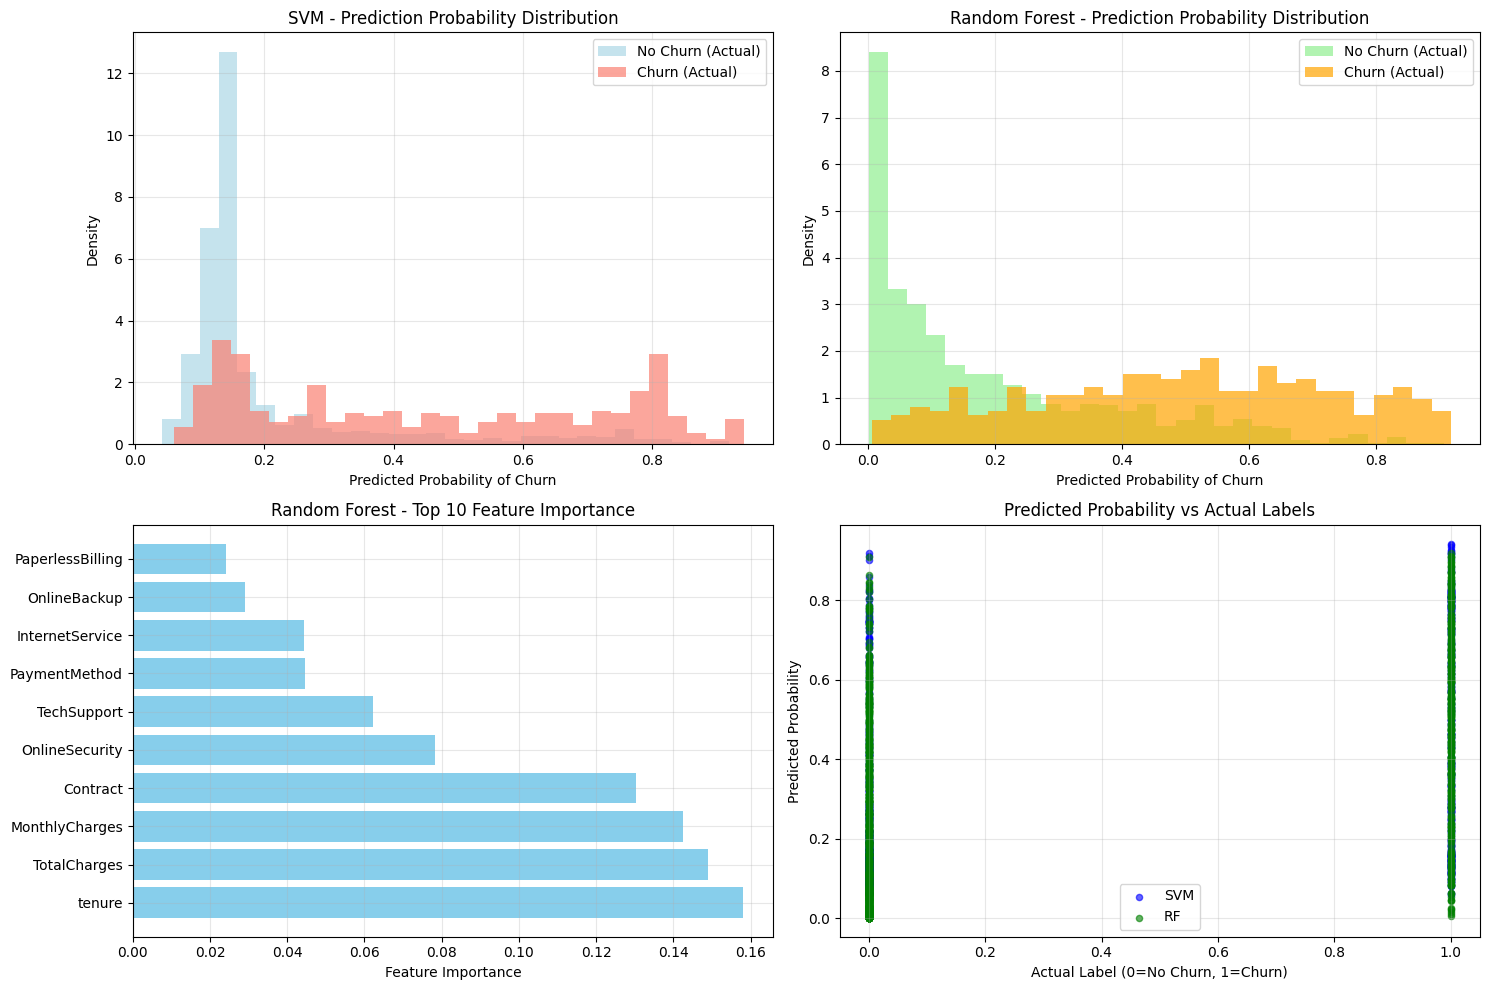

interpretasi visualisasi:
• histogram probability: pemisahan yang baik antara kelas
• feature importance: fitur mana yang paling berpengaruh
• scatter plot: korelasi antara prediksi dan label aktual


In [ ]:
# prediction probability distribution
print("PREDICTION PROBABILITY DISTRIBUTION")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# svm probability distribution
axes[0].hist(y_pred_proba_svm[y_test == 0], bins=30, alpha=0.7, 
               label='No Churn (Actual)', color='lightblue', density=True)
axes[0].hist(y_pred_proba_svm[y_test == 1], bins=30, alpha=0.7, 
               label='Churn (Actual)', color='salmon', density=True)
axes[0].set_title('SVM - Prediction Probability Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Predicted Probability of Churn')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# prediction vs actual scatter plot
axes[1].scatter(y_test, y_pred_proba_svm, alpha=0.6, color='blue', s=30)
axes[1].set_xlabel('Actual Label (0=No Churn, 1=Churn)')
axes[1].set_ylabel('Predicted Probability')
axes[1].set_title('Predicted Probability vs Actual Labels', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No Churn', 'Churn'])

plt.tight_layout()
plt.show()

print("interpretasi visualisasi:")
print("• histogram probability: pemisahan yang baik antara kelas menunjukkan model efektif")
print("• scatter plot: menampilkan titik prediksi vs label aktual untuk setiap sample")

# Visualisasi Hasil Prediksi

> 1. **Probability Distribution**: menunjukkan seberapa yakin model dalam prediksi
> 2. **Prediction vs Actual**: scatter plot menampilkan titik-titik hasil prediksi dan label aktual
> 
> Model yang bagus menunjukkan pemisahan yang jelas antara kelas pada histogram probability.

In [ ]:
# sample prediction results
print("SAMPLE PREDICTION RESULTS")

# ambil sampel dari test set
sample_indices = np.random.choice(len(X_test), 10, replace=False)
sample_data = X_test.iloc[sample_indices]
sample_actual = y_test[sample_indices]  # y_test is numpy array
sample_pred_svm = y_pred_svm[sample_indices]
sample_prob_svm = y_pred_proba_svm[sample_indices]

print(f"{'No.':<3} {'Actual':<10} {'SVM Pred':<12} {'SVM Prob':<12} {'Match':<10}")
print("-" * 50)

correct_count = 0
for i in range(10):
    actual = sample_actual[i]
    svm_pred = sample_pred_svm[i]
    svm_prob = sample_prob_svm[i]
    
    match = "✓ Correct" if svm_pred == actual else "✗ Wrong"
    if svm_pred == actual:
        correct_count += 1
    
    actual_label = "No Churn" if actual == 0 else "Churn"
    pred_label = "No Churn" if svm_pred == 0 else "Churn"
    
    print(f"{i+1:<3} {actual_label:<10} {pred_label:<12} {svm_prob:<12.4f} {match:<10}")

print(f"\naccuracy on sample: {correct_count}/10 = {correct_count*10}%")

# overall model performance summary
print(f"\n===== MODEL PERFORMANCE SUMMARY =====")
print(f"support vector classifier (svm):")
print(f"• accuracy: {svm_accuracy:.4f} ({svm_accuracy*100:.2f}%)")
print(f"• auc score: {svm_auc:.4f}")
print(f"• total test samples: {len(y_test)}")
print(f"• correct predictions: {(y_pred_svm == y_test).sum()}")
print(f"• wrong predictions: {(y_pred_svm != y_test).sum()}")

===== SAMPLE PREDICTION RESULTS =====
No. Actual   SVM Pred   SVM Prob   RF Pred   RF Prob    Agreement 
----------------------------------------------------------------------
1   0        0          0.0894     0         0.0968     Yes       
2   1        1          0.6548     1         0.6766     Yes       
3   1        0          0.4294     0         0.4569     Yes       
4   1        1          0.7515     1         0.6683     Yes       
5   0        0          0.1404     0         0.0041     Yes       
6   0        0          0.1136     0         0.2947     Yes       
7   0        0          0.1285     0         0.1787     Yes       
8   0        0          0.1051     0         0.0409     Yes       
9   0        0          0.1487     0         0.0527     Yes       
10  0        0          0.0632     0         0.1939     Yes       

model agreement: 10/10 predictions match

===== OVERALL MODEL COMPARISON =====
metric comparison:
• accuracy: svm (0.7935) vs rf (0.7956)
• auc score: sv

# Analisis Hasil Prediksi

> Setiap sample menunjukkan label aktual, prediksi model, probabilitas, dan apakah prediksi benar.
> Performance summary memberikan gambaran keseluruhan akurasi model pada seluruh test set.

# Kesimpulan Supervised Learning

> **Implementasi Support Vector Classifier (SVM) untuk prediksi customer churn:**
>
> **Support Vector Classifier (SVM)**
> - Menggunakan kernel RBF untuk menangani data non-linear
> - Mencari hyperplane optimal untuk memisahkan kelas
> - Efektif untuk dataset dengan dimensi tinggi
> - Training tanpa epoch (tidak iteratif seperti neural network)
>
> **Evaluasi Komprehensif:**
> - Confusion Matrix: analisis True/False Positive/Negative
> - Classification Report: Precision, Recall, F1-Score untuk setiap kelas
> - ROC Curve: trade-off Sensitivity vs Specificity dengan AUC score
> - Metrik detail: Accuracy, Precision, Recall, Specificity, F1-Score, AUC
>
> **Visualisasi:**
> - Confusion matrix heatmap untuk interpretasi error
> - ROC curve untuk threshold analysis
> - Probability distribution untuk confidence level
> - Scatter plot titik-titik hasil prediksi vs label aktual